# Predicting if a person would buy life insurnace based on his age using logistic regression

In [45]:
import pandas as pd
from matplotlib import pyplot as plt

In [46]:
df = pd.read_csv("insurance.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


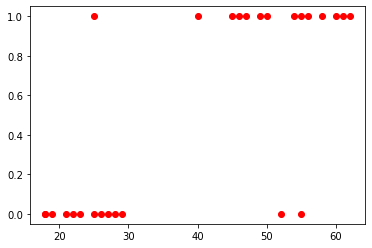

In [47]:
plt.scatter(df.age,df.bought_insurance,color='red')

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [50]:
X_train.shape

(21, 1)

In [51]:
X_test.shape

(6, 1)

In [52]:
from sklearn.linear_model import LogisticRegression

In [65]:
model =LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [67]:
y_predicted = model.predict(X_test)

In [68]:
model.predict_proba(X_test)

array([[0.31271543, 0.68728457],
       [0.28570001, 0.71429999],
       [0.4643293 , 0.5356707 ],
       [0.37060012, 0.62939988],
       [0.25195076, 0.74804924],
       [0.60244578, 0.39755422]])

In [69]:
model.score(X_test,y_test)

1.0

In [70]:
y_predicted

array([1, 1, 1, 1, 1, 0], dtype=int64)

# model.coef_ indicates value of m in y=m*x + b equation

In [71]:
model.coef_

array([[0.04296861]])

# model.intercept_ indicates value of b in y=m*x + b equation

In [72]:
model.intercept_

array([-1.57581894])

# Lets defined sigmoid function now and do the math with hand

In [73]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [74]:
def prediction_function(age):
    z = 0.043 * age - 1.58 
    y = sigmoid(z)
    return y

In [75]:
age = 35
prediction_function(age)

0.48125878412146467

# 0.481 is less than 0.5 which means person with 35 age will not buy insurance


In [76]:
age = 43
prediction_function(age)

0.5668473899714963

# 0.566 is more than 0.5 which means person with 43 age will buy the insurance 